In [24]:
%run Imputation.ipynb

In [4]:
import pandas as pd
import numpy as np

In [5]:
#!pip3 install seaborn
import seaborn as sns

In [6]:
air_station_data = pd.read_csv("../dataset/station_wise_data/18644/air_quality_data.csv", 
                               delimiter=';', skiprows=12)
air_station_data.rename(columns = {"NO2 (344)": "NO2", "NOX as NO2 (345)": "NOX as NO2", 
                         "PM10 (342)": "PM10", "PM2.5 (343)": "PM2.5"}, inplace=True)

In [7]:
air_station_data

,Start,Slut,NO2,NOX as NO2,PM10,PM2.5
0,2014-01-01 00:00,2014-01-01 01:00,10.4,14.5,56.5,57.7
1,2014-01-01 01:00,2014-01-01 02:00,12.9,20.3,13.0,9.5
2,2014-01-01 02:00,2014-01-01 03:00,9.7,12.9,11.4,6.9
3,2014-01-01 03:00,2014-01-01 04:00,4.4,4.9,12.8,8.4
4,2014-01-01 04:00,2014-01-01 05:00,6.7,8.8,11.0,7.3
...,...,...,...,...,...,...
43819,2018-12-31 19:00,2018-12-31 20:00,11.1,17.3,5.2,3.6
43820,2018-12-31 20:00,2018-12-31 21:00,14.1,23.1,9.9,4.9
43821,2018-12-31 21:00,2018-12-31 22:00,11.6,16.8,11.5,3.3
43822,2018-12-31 22:00,2018-12-31 23:00,10.4,15.4,7.7,2.6


# Adding date and time features

In [8]:
# TODO: add holiday
def add_date_time_features(air_station_data):
    air_station_data['Date'] = pd.to_datetime(air_station_data['Start'])
    air_station_data.set_index('Date', inplace=True)
    air_station_data.drop("Start", axis=1, inplace=True)
    air_station_data.drop("Slut", axis=1, inplace=True)
    air_station_data["Day"] = air_station_data.index.day
    air_station_data["Year"] = air_station_data.index.year
    air_station_data["Week of Year"] = air_station_data.index.weekofyear
    air_station_data["Month"] = air_station_data.index.month
    air_station_data['Hour'] = air_station_data.index.hour
    return air_station_data

# Checking missing values in each column

In [9]:
def missing_values(station):
  for column in station:
    if station[column].isnull().any():       
       print('{0} has {1} null values'.format(column, station[column].isnull().sum()))

In [10]:
missing_values(air_station_data)

NO2 has 378 null values
NOX as NO2 has 371 null values
PM10 has 650 null values
PM2.5 has 1069 null values


In [11]:
air_station_data = add_date_time_features(air_station_data)

In [12]:
air_station_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NO2,43446.0,34.181715,21.191700,0.3,17.80,30.6,47.00,172.8
NOX as NO2,43453.0,76.381384,67.554818,0.2,29.60,57.3,103.00,926.8
PM10,43174.0,25.068965,24.109737,-2.5,11.10,17.6,29.20,303.2
PM2.5,42755.0,6.007941,5.200706,-3.0,2.80,5.0,8.00,81.0
Day,43824.0,15.727820,8.799425,1.0,8.00,16.0,23.00,31.0
Year,43824.0,2016.000000,1.413842,2014.0,2015.00,2016.0,2017.00,2018.0
Week of Year,43824.0,26.615553,15.061131,1.0,14.00,27.0,40.00,53.0
Month,43824.0,6.523549,3.448572,1.0,4.00,7.0,10.00,12.0
Hour,43824.0,11.500000,6.922266,0.0,5.75,11.5,17.25,23.0


ToDO:
Add imputation techniques and apply

ToDO: read csvs and merge

Meteorological Data

# Adding meteorological data

In [13]:
meteorological_data = pd.read_csv("../dataset/meteorological_data/merged_meteorological_data.csv")
meteorological_data['Date'] = pd.to_datetime(meteorological_data['Date'])
meteorological_data.head()

,Unnamed: 0,Date,Lufttryck reducerat havsytans nivå,Lufttemperatur,Nederbördsmängd,Relativ Luftfuktighet
0,0,2012-11-29 11:00:00,1006.6,-0.7,0.0,98
1,1,2012-11-29 12:00:00,1006.2,-0.7,0.1,97
2,2,2012-11-29 13:00:00,1005.9,-0.8,0.1,97
3,3,2012-11-29 14:00:00,1005.7,-1.0,0.0,97
4,4,2012-11-29 15:00:00,1005.6,-1.2,0.0,96


TODO: Read files using different imputation techniques

In [14]:
merged = pd.read_csv("MI_imputed.csv")
merged.rename(columns = {"Lufttryck reducerat havsytans nivå": "Air Pressure", "Lufttemperatur": "Temperature", 
                         "Nederbördsmängd": "Precipitation Amount", "Relativ Luftfuktighet": "Relative Humidity"}, inplace=True)
merged.drop("Unnamed: 0", axis=1, inplace=True)

FileNotFoundError: [Errno 2] File MI_imputed.csv does not exist: 'MI_imputed.csv'

In [15]:
merged.head()

NameError: name 'merged' is not defined

In [16]:
merged = pd.merge(air_station_data, meteorological_data, on='Date')
#merged.set_index('Date', inplace=True)
merged.head()

,Date,NO2,NOX as NO2,PM10,PM2.5,Day,Year,Week of Year,Month,Hour,Unnamed: 0,Lufttryck reducerat havsytans nivå,Lufttemperatur,Nederbördsmängd,Relativ Luftfuktighet
0,2014-01-01 00:00:00,10.4,14.5,56.5,57.7,1,2014,1,1,0,9528,1015.7,2.9,0.0,92
1,2014-01-01 01:00:00,12.9,20.3,13.0,9.5,1,2014,1,1,1,9529,1015.9,2.8,0.0,93
2,2014-01-01 02:00:00,9.7,12.9,11.4,6.9,1,2014,1,1,2,9530,1015.4,3.2,0.0,94
3,2014-01-01 03:00:00,4.4,4.9,12.8,8.4,1,2014,1,1,3,9531,1015.2,3.6,0.0,93
4,2014-01-01 04:00:00,6.7,8.8,11.0,7.3,1,2014,1,1,4,9532,1014.8,3.0,0.0,92


# Correlation plot of each feature against PM10

In [17]:
def corr_plot_against_pm10(merged):
    cor = merged[['NO2', 'NOX as NO2', 'PM10', 'PM2.5', 'Station ID', 'Lufttryck reducerat havsytans nivå', 'Lufttemperatur','Nederbördsmängd', 'Relativ Luftfuktighet','Global Irradians (svenska stationer)']].corr()[['PM10'][:]]
    plt.subplots(figsize=(20,15))
    sns.heatmap(cor, annot=True, linewidths=.0000000001)
    plt.show()

# Changing relative humidity from percentage to decimal

In [18]:
merged['Relativ Luftfuktighet'] = merged['Relativ Luftfuktighet']/100

# Replacing negative values by nan

In [19]:
def replace_negative_values(merged):
    pm10 = merged['PM10']
    pm10 = pm10.apply(lambda x: np.nan if x < 0 else x)

    pm2 = merged['PM2.5']
    pm2 = pm2.apply(lambda x: np.nan if x < 0 else x)
    pm2.describe().transpose()


    merged['PM10'] = pm10
    merged['PM2.5'] = pm2
    return(merged)

In [20]:
merged = replace_negative_values(merged)

# Imputing values using mice forest(defined in Imputation.ipynb)

Null Values per column NO2            377
NOX as NO2     370
PM10           683
PM2.5         3089
dtype: int64
AxesSubplot(0.547727,0.125;0.281818x0.343182)
[0.01, 0.02, 0.03, 1.0]


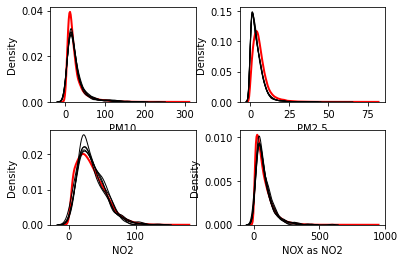

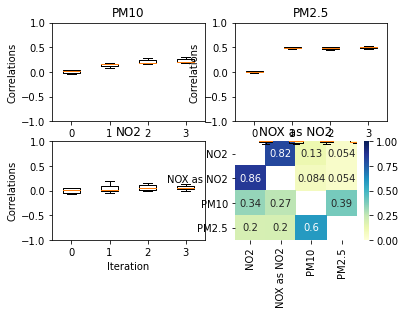

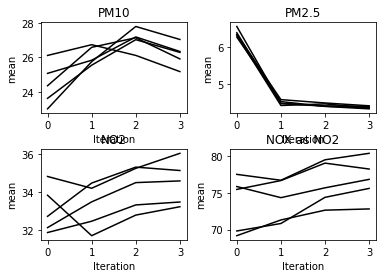

In [25]:
merged = mice_forest(merged)

In [28]:
print(missing_values(new_merged))

None
